$$ \left\{\begin{matrix}
y'(x) + xy^2 = 5xy \\y(0)=1
\end{matrix}\right. $$

In [4]:
import sympy as sp

# Определяем переменные
x = sp.symbols('x')
y = sp.Function('y')(x)

# Определяем уравнение
equation = sp.Eq(y.diff(x) + x*y**2, 5*x*y)

# Решаем уравнение
solution = sp.dsolve(equation, y)

# Выводим общее решение
# print("Общее решение:")
solution

[Eq(y(x), 5*(-exp(5*x**2) - sqrt(exp(C1 + 5*x**2)))/(exp(C1) - exp(5*x**2))),
 Eq(y(x), 5*(-exp(5*x**2) + sqrt(exp(C1 + 5*x**2)))/(exp(C1) - exp(5*x**2)))]

In [5]:
# Определяем начальное условие
initial_condition = {y.subs(x, 0): 1}

# Находим частное решение с учетом начального условия
particular_solution = sp.dsolve(equation, y, ics=initial_condition)

# Выводим частное решение
print("Частное решение с начальным условием y(0) = 1:")
particular_solution

Частное решение с начальным условием y(0) = 1:


Eq(y(x), 5*(-exp(5*x**2) + 4*sqrt(exp(5*x**2)))/(16 - exp(5*x**2)))

Численное решение с помощью SciPy

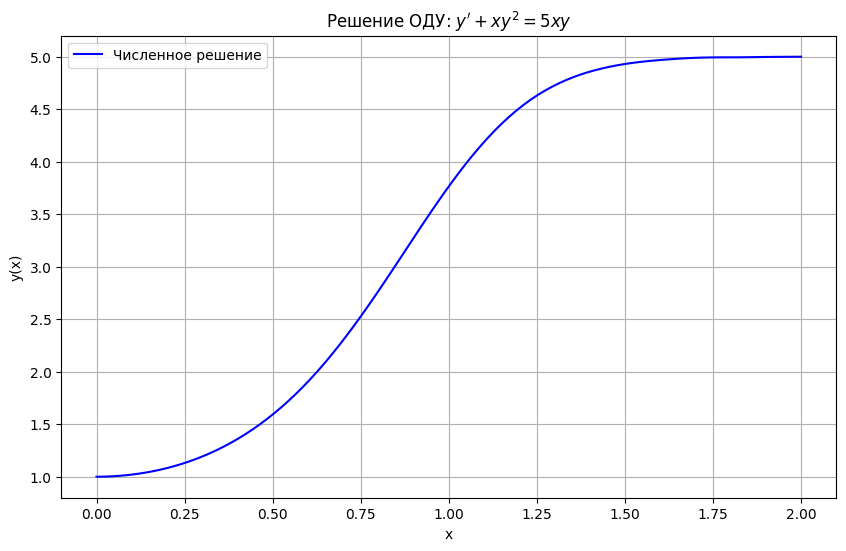

In [11]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Преобразуем уравнение в форму: dy/dx = f(x, y)
def dydx(x, y):
    return 5*x*y - x*y**2  # y' = 5xy - xy²

# Интервал решения: [0, 2]
x_span = (0, 2)
x_eval = np.linspace(0, 2, 100)

# Решаем ОДУ численно
sol_num = solve_ivp(dydx, x_span, [1], t_eval=x_eval, method='RK45')

# График решения
plt.figure(figsize=(10, 6))
plt.plot(sol_num.t, sol_num.y[0], 'b-', label='Численное решение')
plt.title('Решение ОДУ: $y\' + xy^2 = 5xy$')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
plt.legend()
plt.show()
